## 画像の水増しをする方法！

ディープラーニングのCNN等のクラス分類の精度を向上させるためには、優れた学習データセットが必要です。精度を担保するためには、以下のような工夫をする必要があります。  

十分な画像枚数を用意する  
各タグの画像枚数を揃える  
タグ付けをより正確に行う  
同じ分類のものでも、見た目が異なる場合は細かくタグを分ける  
これらを行うためには、とにかく枚数が必要です。種類によって枚数に偏りがある場合もあり、すべて手作業で抽出・タグ付けしていると大変です。  
(出典 : https://qiita.com/bohemian916/items/9630661cd5292240f8c7#%E7%94%BB%E5%83%8F%E6%B0%B4%E5%A2%97%E3%81%97%E3%81%AE%E6%84%8F%E7%BE%A9)

In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# usage: ./increase_picture.py hogehoge.jpg
#

import cv2
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import math

## 左右反転の画像を作成する  
上限反転すると, 画像がおかしくなるので注意.

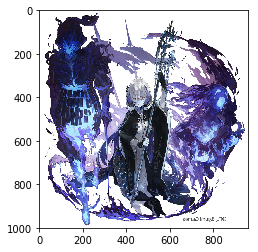

In [4]:
src = cv2.imread("/Users/facul/Pictures/tagatame.jpg", 1)
src = cv2.flip(src, 1)
plt.imshow(src)
plt.show()  #これないと, matplot～的なのが出る.

## 平均化
平均化することで画像の水増しをする

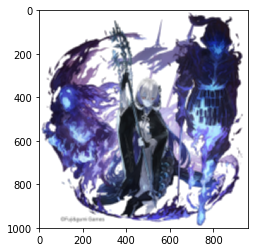

In [5]:
average_square = (10,10)
src = cv2.imread("/Users/facul/Pictures/tagatame.jpg", 1)
blur_img = cv2.blur(src, average_square)
plt.imshow(blur_img)
plt.show()  #これないと, matplot～的なのが出る.

## 拡大縮小
画像を拡大縮小することで, 画像を水増しする.  
でも拡大したら, そもそもの問題外になっちゃうので却下.

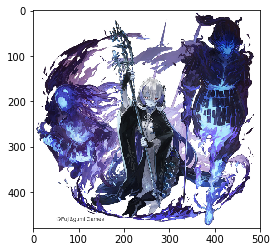

In [12]:
src = cv2.imread("/Users/facul/Pictures/tagatame.jpg", 1)
hight = src.shape[0]
width = src.shape[1]
half_img = cv2.resize(src,(math.floor(hight/2),math.floor(width/2)))
plt.imshow(half_img)
plt.show()  #これないと, matplot～的なのが出る.

## コントラスト調整
コントラストを調整して画像を水増し.
これは輝度に影響するので色相には関係ない？（知らべて）

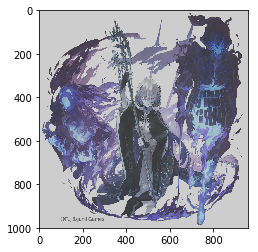

In [14]:
# ローコントラスト画像の作成
# ルックアップテーブルの生成
min_table = 50
max_table = 205
diff_table = max_table - min_table

LUT_LC = np.arange(256, dtype = 'uint8' )

# ローコントラストLUT作成
for i in range(256):
    LUT_LC[i] = min_table + i * (diff_table) / 255
    
# 変換
src = cv2.imread("/Users/facul/Pictures/tagatame.jpg", 1)
low_cont_img = cv2.LUT(src, LUT_LC)
plt.imshow(low_cont_img)
plt.show()  #これないと, matplot～的なのが出る.

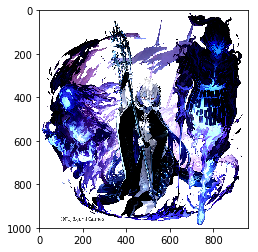

In [15]:
# ハイコントラスト画像の作成
# ルックアップテーブルの生成
min_table = 50
max_table = 205
diff_table = max_table - min_table

LUT_HC = np.arange(256, dtype = 'uint8' )

# ハイコントラストLUT作成
for i in range(0, min_table):
    LUT_HC[i] = 0
for i in range(min_table, max_table):
    LUT_HC[i] = 255 * (i - min_table) / diff_table
for i in range(max_table, 255):
    LUT_HC[i] = 255
    
# 変換
src = cv2.imread("/Users/facul/Pictures/tagatame.jpg", 1)
high_cont_img = cv2.LUT(src, LUT_HC)
plt.imshow(high_cont_img)
plt.show()  #これないと, matplot～的なのが出る.